## Walmart Sales Forecast

File Kaggle: https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast

- features.csv -> This file contains additional data related to the store, department, and regional activity for the given dates.
- stores.csv -> This file contains anonymized information about the 45 stores, indicating the type and size of the store
- train.csv -> This is the historical training data, which covers 2010–02–05 to 2012–11–01
- test.csv -> This file is identical to train.csv, except we have withheld the weekly sales.

### Importar bibliotecas e arquivos

In [ ]:
# Importar bibliotecas
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Diretório
path = "C:\\Users\\danmo\\Documents\\data_analysis\\data_walmart"

# Listar arquivos no direrório
files = os.listdir(path)
print(files)

['features.csv', 'stores.csv', 'test.csv', 'train.csv']


In [3]:
# Carregar cada arquivo CSV
df_features = pd.read_csv(os.path.join(path, 'features.csv'))
df_stores = pd.read_csv(os.path.join(path, 'stores.csv'))
df_test = pd.read_csv(os.path.join(path, 'test.csv'))
df_train = pd.read_csv(os.path.join(path, 'train.csv'))

### Análise e tratamento dos dados

#### Análise df_features

In [5]:
print("Análise df_features: \n")
print(df_features.head())

Análise df_features: 

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [6]:
print(df_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [7]:
# Tranformando a coluna 'Date' em formato de data
df_features['Date'] = pd.to_datetime(df_features['Date'])
print(df_features['Date'].dtypes)

datetime64[ns]


In [8]:
print(df_features.describe())

             Store                 Date  Temperature   Fuel_Price  \
count  8190.000000                 8190  8190.000000  8190.000000   
mean     23.000000  2011-10-31 12:00:00    59.356198     3.405992   
min       1.000000  2010-02-05 00:00:00    -7.290000     2.472000   
25%      12.000000  2010-12-17 00:00:00    45.902500     3.041000   
50%      23.000000  2011-10-31 12:00:00    60.710000     3.513000   
75%      34.000000  2012-09-14 00:00:00    73.880000     3.743000   
max      45.000000  2013-07-26 00:00:00   101.950000     4.468000   
std      12.987966                  NaN    18.678607     0.431337   

           MarkDown1      MarkDown2      MarkDown3     MarkDown4  \
count    4032.000000    2921.000000    3613.000000   3464.000000   
mean     7032.371786    3384.176594    1760.100180   3292.935886   
min     -2781.450000    -265.760000    -179.260000      0.220000   
25%      1577.532500      68.880000       6.600000    304.687500   
50%      4743.580000     364.570000   

In [9]:
#Verificando valores ausentes
df_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

C:\Users\danmo\AppData\Local\Temp\ipykernel_22680\2523231873.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range(start='2010-02-05', end='2013-07-26', freq='6M'),


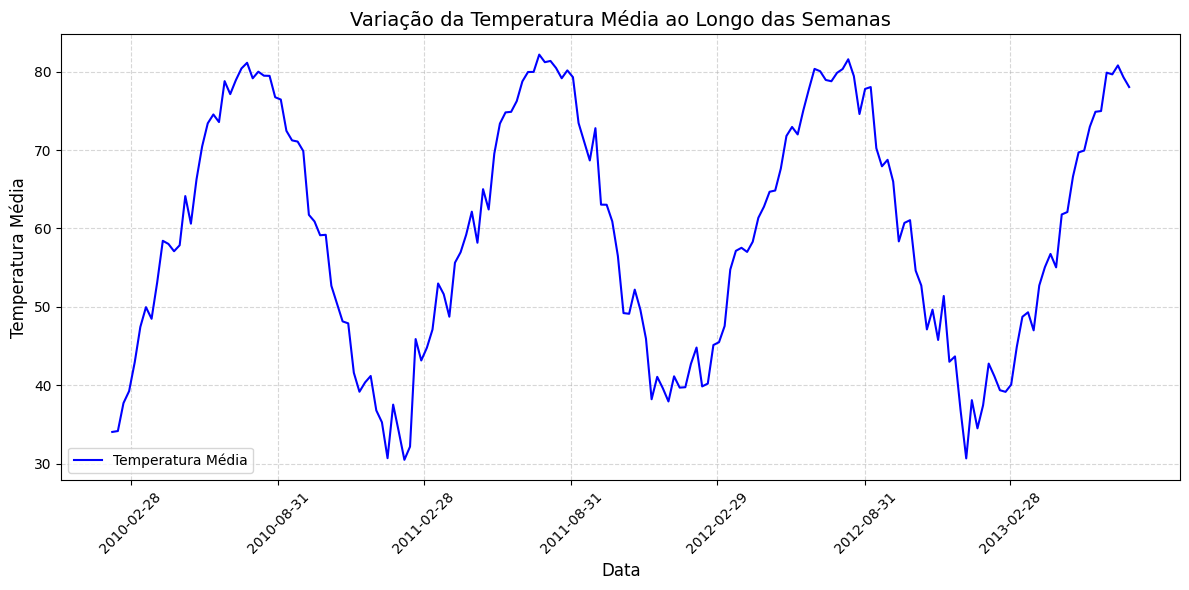

In [10]:
# CRIAR GRÁFICO DE LINHAS PARA VERIFICAR EVOLUÇÃO DA TEMPERATURA

# Agrupar por data e calcular a média da temperatura
temperature_by_date = df_features.groupby('Date')['Temperature'].mean()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(temperature_by_date.index, temperature_by_date.values, label='Temperatura Média', color='blue')

# Adicionar título e rótulos
plt.title('Variação da Temperatura Média ao Longo das Semanas', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Temperatura Média', fontsize=12)

# Formatando o eixo x para mostrar menos datas (resumo)
plt.xticks(pd.date_range(start='2010-02-05', end='2013-07-26', freq='6M'),
           rotation=45, fontsize=10)  # Datas a cada 6 meses

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.grid(True, linestyle='--', alpha=0.5)  # Grade para melhor visualização
plt.tight_layout()
plt.show()


#### Análise df_stores

In [11]:
print("Análise df_stores: \n")
print(df_stores.head())

Análise df_stores: 

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [12]:
print(df_stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


In [13]:
print(df_stores.describe())

           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


#### Análise df_train

In [14]:
print("Análise df_train: \n")
print(df_train.head())

Análise df_train: 

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [15]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [16]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
print(df_train['Date'].dtypes)

datetime64[ns]


In [17]:
print(df_train.describe())

               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales  
count  421570.000000  
mean    15981.258123  
min     -4988.940000  
25%      2079.650000  
50%      7612.030000  
75%     20205.852500  
max    693099.360000  
std     22711.183519  


In [18]:
print(df_train.isna().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


Analisando Weekly_Sales negativos

In [19]:
# Contar a quantidade de valores de vendas negativas
negative_sales_count = df_train[df_train['Weekly_Sales'] < 0].shape[0]
print("Negative Sales Count: ", negative_sales_count)

Negative Sales Count:  1285


In [20]:
# Contar a quantidade de vendas negativas por Stores, para ver se é erro de apenas uma loja
negative_sales = df_train[df_train['Weekly_Sales'] < 0]
negative_sales_count_by_store = negative_sales.groupby('Store').size()
print("Quantidade de Vendas Negativas por Store: ", negative_sales_count_by_store)

Quantidade de Vendas Negativas por Store:  Store
1      15
2      22
3       9
4       5
5      21
6      21
7      22
8      11
9      32
10     50
11     28
12     37
13     15
14     32
15     45
16     38
17     49
18     52
19     29
20     38
21     36
22     41
23     32
24     18
25     33
26      8
27     27
28     13
29     31
30     16
31     39
32     31
33      8
34     18
35    124
36     25
37      8
38      9
39     38
40     14
41     30
42     44
43     21
44     26
45     24
dtype: int64


Existem Weekly_Sales negativos, o que a princípio não faz sentido.
Como não tem infomação explicita a respeito disto e não podemos ter valores faltantes em uma série temporal,
vamos tranformar os valores negativos em zero

In [21]:
df_train.loc[df_train['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0
print(df_train['Weekly_Sales'].describe())

count    421570.000000
mean      15981.467250
std       22711.032446
min           0.000000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


#### Análise df_test

In [22]:
print("Análise df_test: \n")
print(df_test.head())

Análise df_test: 

   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False


In [23]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None


In [24]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
print(df_test['Date'].dtypes)

datetime64[ns]


In [25]:
print(df_test.describe())

               Store           Dept                           Date
count  115064.000000  115064.000000                         115064
mean       22.238207      44.339524  2013-03-14 14:39:41.311270144
min         1.000000       1.000000            2012-11-02 00:00:00
25%        11.000000      18.000000            2013-01-04 00:00:00
50%        22.000000      37.000000            2013-03-15 00:00:00
75%        33.000000      74.000000            2013-05-24 00:00:00
max        45.000000      99.000000            2013-07-26 00:00:00
std        12.809930      30.656410                            NaN


### Unir Dataframes

In [26]:
# Merge do df_train com df_features usando Store e Date como chaves (LEFT JOIN para manter os dados de vendas)
merged_df = pd.merge(df_train, df_features, on=['Store', 'Date'], how='left')

# Merge do resultado com df_stores usando a coluna Store
merged_df = pd.merge(merged_df, df_stores, on='Store', how='left')

# Verificar as primeiras linhas para confirmar a união:
print(merged_df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday_y Type    Size  
0         8.106        False    A  1

### Pré-processamento

In [27]:
# Extrair features temporais: Ano, Mês e Semana (isso pode ajudar na análise preditiva)
merged_df['Year']  = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Week']  = merged_df['Date'].dt.isocalendar().week
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [28]:
print(merged_df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday_y Type    Size  Year  Month  Week  
0         8.106  

In [29]:
merged_df['IsHoliday'] = merged_df['IsHoliday_x']
merged_df.drop(['IsHoliday_x', 'IsHoliday_y'], axis=1, inplace=True)

Converter colunas categóricas para numéricas.


In [30]:
# Converter 'IsHoliday' que está como boolean para 0/1:
merged_df['IsHoliday'] = merged_df['IsHoliday'].astype(int)

In [31]:
# Para a coluna 'Type' do df_stores, que indica o tipo de loja (ex.: A, B, C), vamos transformá-la em códigos numéricos.
merged_df['Type'] = merged_df['Type'].astype('category').cat.codes

### Contruir Matriz de Correlação

In [32]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week', 'IsHoliday'],
      dtype='object')

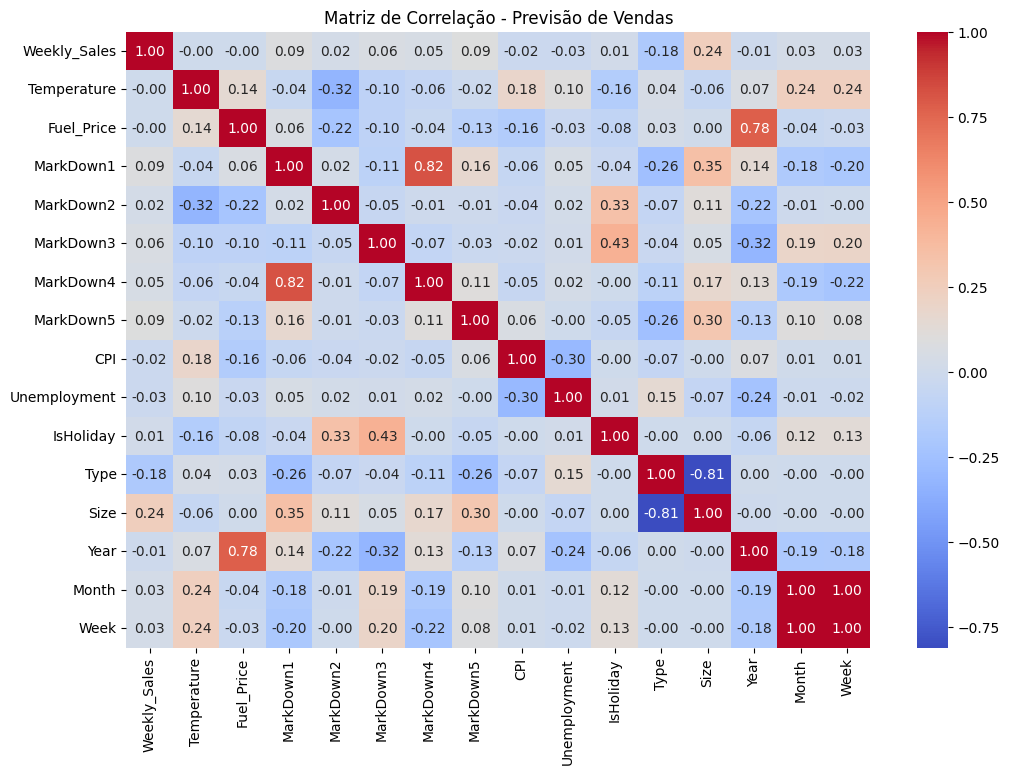

In [33]:
# Selecionando as colunas que serão analisadas; 
# Excluímos 'Date' para correlação, mas mantendo as features temporais:
features_for_corr = [
    'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
    'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
    'IsHoliday', 'Type', 'Size', 'Year', 'Month', 'Week'
]

corr_df = merged_df[features_for_corr].copy()

# Calcular a matriz de correlação
correlation_matrix = corr_df.corr()

# Exibir a matriz com o heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matriz de Correlação - Previsão de Vendas")
plt.show()

### Análise Preditiva

In [34]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week', 'IsHoliday'],
      dtype='object')

In [35]:
merged_df['Date'].head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

In [36]:
# Ordenar os dados por data, garantindo a ordem temporal
merged_df = merged_df.sort_values('Date')

In [37]:
# Separação dos dados em treino e teste (time-based split)
split_date = merged_df['Date'].quantile(0.8)
train = merged_df[merged_df['Date'] <= split_date]
test  = merged_df[merged_df['Date'] > split_date]

print(f"Dados de treino: {train['Date'].min().date()} até {train['Date'].max().date()}")
print(f"Dados de teste: {test['Date'].min().date()} até {test['Date'].max().date()}")

Dados de treino: 2010-02-05 até 2012-04-13
Dados de teste: 2012-04-20 até 2012-10-26


In [38]:
# Seleção de features e target
features = [
    'Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 
    'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 
    'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week', 'IsHoliday'
]
target = 'Weekly_Sales'

X_train = train[features]
y_train = train[target]
X_test  = test[features]
y_test  = test[target]

In [ ]:
# Treinando um modelo preditivo XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões para o conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R2:", r2)

Test RMSE: 6437.709378626083
Test R2: 0.9141153557074178


Cálculo do RMSE:
Usamos a função mean_squared_error para calcular o erro quadrático médio entre os totais reais e previstos e, em seguida, tiramos a raiz quadrada para encontrar o RMSE, que está na mesma unidade dos dados (neste caso, vendas).

- Um resultado de RMSE de 6437 é ruim, porque a média de Weekly_Sales é de 15981, ou seja, representa aproximadamente 40,27% do valor médio

Cálculo do R²:
A função r2_score compara os valores reais e previstos e retorna a proporção da variância explicada pelo modelo. Um R² próximo de 1 indica um ajuste muito bom.

- O valor de R² ≈ 0.91 indica que 91% da variabilidade dos dados de vendas foi explicada pelo modelo. Geralmente, um R² alto reforça a ideia de que, apesar do RMSE numérico, o modelo está capturando bem o padrão dos dados.



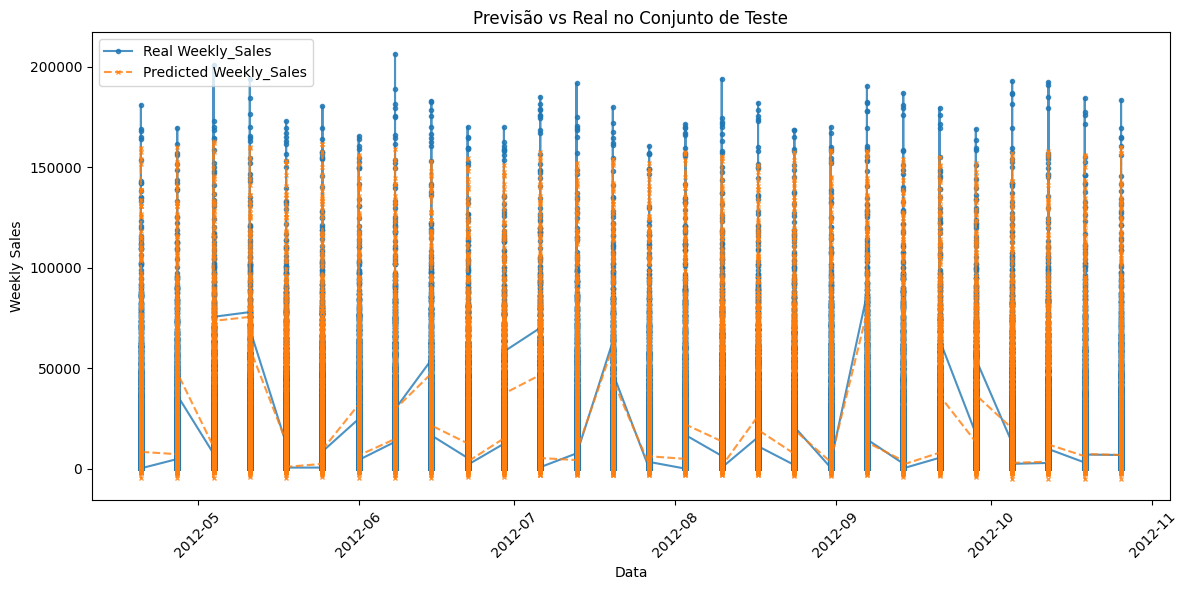

In [40]:
# Visualizando as previsões no conjunto de teste

plt.figure(figsize=(12, 6))
plt.plot(test['Date'], y_test, label='Real Weekly_Sales', marker='o', 
         linestyle='-', markersize=3, alpha=0.8)
plt.plot(test['Date'], y_pred, label='Predicted Weekly_Sales', marker='x', 
         linestyle='--', markersize=3, alpha=0.8)

plt.title('Previsão vs Real no Conjunto de Teste')
plt.xlabel('Data')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Prevendo o total de vendas do Walmart

In [42]:
# Supondo que:
# - test seja o DataFrame de teste contendo a coluna 'Date' e 'Weekly_Sales'
# - y_pred contenha as previsões do modelo para cada linha de test

# Crie um DataFrame dos resultados utilizando as previsões do modelo
test_results = test[['Date', 'Weekly_Sales']].copy()
test_results['Predicted_Weekly_Sales'] = y_pred

# Agrupe por 'Date' para obter o total das vendas reais e previstas por dia (ou semana)
aggregated = test_results.groupby('Date').sum().reset_index()

# Exibir os dados agregados para conferência
print(aggregated.head())

        Date  Weekly_Sales  Predicted_Weekly_Sales
0 2012-04-20   45073217.62              47196980.0
1 2012-04-27   43717315.31              46821336.0
2 2012-05-04   47124459.51              47494620.0
3 2012-05-11   46926829.21              47264096.0
4 2012-05-18   46824854.84              46793156.0


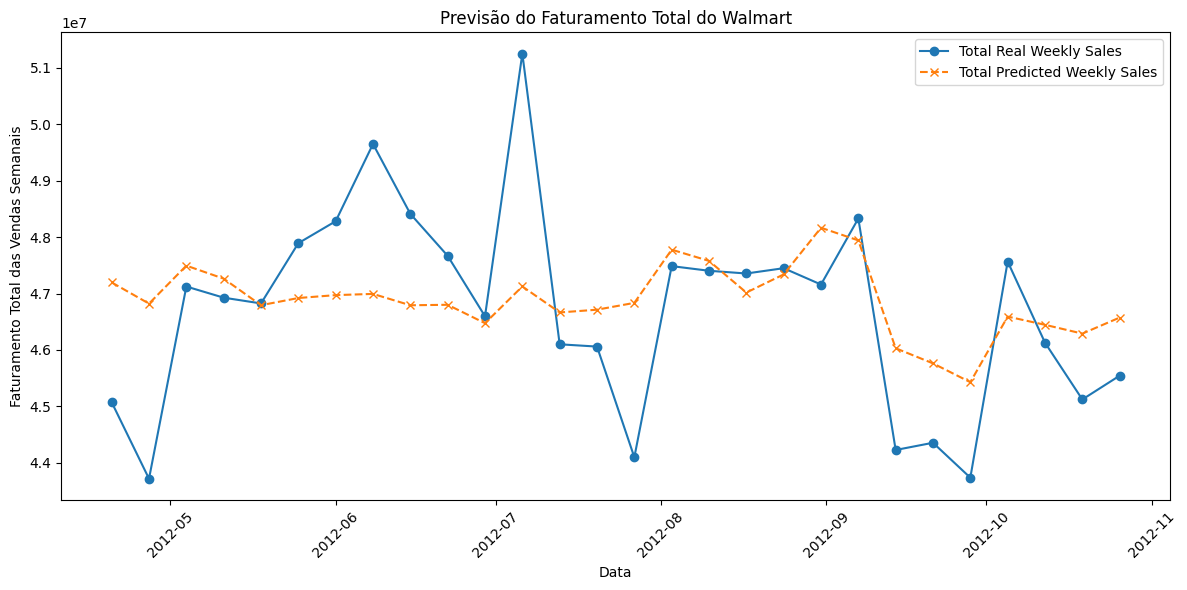

In [43]:
# Plotar o faturamento total real vs previsto no tempo
plt.figure(figsize=(12, 6))
plt.plot(aggregated['Date'], aggregated['Weekly_Sales'], 
         label='Total Real Weekly Sales', marker='o', linestyle='-')
plt.plot(aggregated['Date'], aggregated['Predicted_Weekly_Sales'], 
         label='Total Predicted Weekly Sales', marker='x', linestyle='--')

plt.xlabel('Data')
plt.ylabel('Faturamento Total das Vendas Semanais')
plt.title('Previsão do Faturamento Total do Walmart')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
# Calcular o RMSE para os valores agregados
rmse_agg = np.sqrt(mean_squared_error(aggregated['Weekly_Sales'], aggregated['Predicted_Weekly_Sales']))

# Calcular o R² para os valores agregados
r2_agg = r2_score(aggregated['Weekly_Sales'], aggregated['Predicted_Weekly_Sales'])

print("Aggregated Test RMSE:", rmse_agg)
print("Aggregated Test R2:", r2_agg)

Aggregated Test RMSE: 1532610.3456705823
Aggregated Test R2: 0.2428562813690266


RESULTADO:

Quando você treina um modelo para prever as vendas em cada loja individualmente, ele pode capturar razoavelmente bem as variações dentro de cada grupo (loja). No entanto, ao somar essas previsões para obter o faturamento total do Walmart, alguns fatores podem levar a uma piora expressiva nas métricas agregadas.